In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob2
import json
from truss_y import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from sympy.physics.continuum_mechanics.truss import Truss
from utils import *
import traceback
# from openai_runner import *
import ast
from tqdm import tqdm
import glob2
import os

In [2]:
area_id = {
        "0": 1,
        "1": 0.195,
        "2": 0.782,
        "3": 1.759,
        "4": 3.128,
        "5": 4.887,
        "6": 7.037,
        "7": 9.578,
        "8": 12.511,
        "9": 15.834,
        "10": 19.548,
    }

load = {
    "node_4": (-10,-45),
}
supports = {
    "node_1": "pinned",
    "node_2": "roller",
}

In [3]:
fol = "./q1p3"

for i in range(10):
    files = glob2.glob(fol + f"/*_run_{i}/**.json")

    files = sorted(files, key=lambda x: int(x.split("/")[-1].split(".")[0].split("_")[-1]))
    print(i,len(files))

files

0 2
1 23
2 11
3 7
4 25
5 5
6 23
7 1
8 3
9 7


['./q1p3/q1_p3_run_9/0.json',
 './q1p3/q1_p3_run_9/1.json',
 './q1p3/q1_p3_run_9/2.json',
 './q1p3/q1_p3_run_9/3.json',
 './q1p3/q1_p3_run_9/4.json',
 './q1p3/q1_p3_run_9/5.json',
 './q1p3/q1_p3_run_9/6.json']

In [4]:
for i in range(7):
    f=files[i]
    loaded = json.load(open(f))
    print(f)
    print(loaded.keys())
    node_dict = loaded["node_dict"]
    member_dict = loaded["member_dict"]
    t = make_truss(node_dict, member_dict, load, supports)
    # plot_truss(t)


./q1p3/q1_p3_run_9/0.json
dict_keys(['node_dict', 'member_dict', 'result'])
./q1p3/q1_p3_run_9/1.json
dict_keys(['node_dict', 'member_dict', 'result'])
./q1p3/q1_p3_run_9/2.json
dict_keys(['node_dict', 'member_dict', 'result'])
./q1p3/q1_p3_run_9/3.json
dict_keys(['node_dict', 'member_dict', 'result'])
./q1p3/q1_p3_run_9/4.json
dict_keys(['node_dict', 'member_dict', 'result'])
./q1p3/q1_p3_run_9/5.json
dict_keys(['node_dict', 'member_dict', 'result'])
./q1p3/q1_p3_run_9/6.json
dict_keys(['node_dict', 'member_dict', 'result'])


In [5]:
print(node_dict)

{'node_1': [0, 0], 'node_2': [6, 0], 'node_3': [2, 0], 'node_4': [0, 3], 'node_5': [2, 3], 'node_6': [6, 3], 'node_7': [3, 1.5]}


In [6]:
print(member_dict)

{'member_1': ['node_1', 'node_3', '0'], 'member_2': ['node_2', 'node_3', '0'], 'member_3': ['node_1', 'node_4', '2'], 'member_4': ['node_4', 'node_5', '2'], 'member_5': ['node_5', 'node_3', '0'], 'member_6': ['node_3', 'node_6', '2'], 'member_7': ['node_2', 'node_6', '2'], 'member_8': ['node_5', 'node_6', '1'], 'member_9': ['node_1', 'node_5', '1'], 'member_10': ['node_2', 'node_5', '1'], 'member_11': ['node_7', 'node_3', '3'], 'member_12': ['node_7', 'node_1', '1'], 'member_13': ['node_7', 'node_2', '1'], 'member_14': ['node_7', 'node_4', '1'], 'member_15': ['node_7', 'node_5', '1'], 'member_16': ['node_7', 'node_6', '1']}


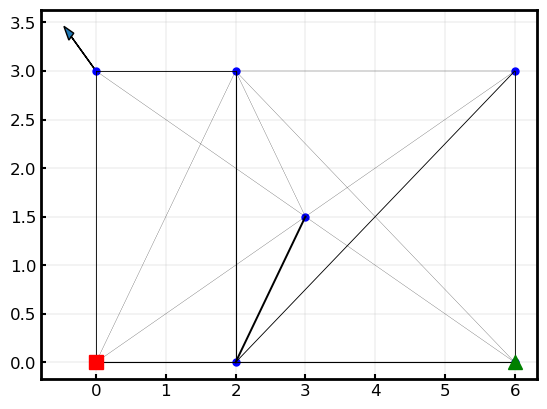

{'member_1': -4.523989480025708, 'member_2': -3.0817512228108557, 'member_3': 7.668049676216738, 'member_4': 6.293813148001925, 'member_5': 0.5589663382441027, 'member_6': -3.4194182599705454, 'member_7': 2.075100620719741, 'member_8': 11.15827353377892, 'member_9': -10.97697859250918, 'member_10': 9.53665664421709, 'member_11': 0.7142945601934906, 'member_12': -7.796059929998782, 'member_13': 9.139399150151903, 'member_14': 12.323061959511682, 'member_15': 0.6549006036509053, 'member_16': -0.2102779729369601}


In [7]:
t = make_truss(node_dict, member_dict, load, supports)
plot_truss(t)
print(t.member_stress())

In [8]:
import numpy as np
from pymoo.core.problem import Problem

In [9]:
def node_dict_to_vector(node_dict):
    """Flattens a node dict to a 1D list in consistent order."""
    sorted_keys = sorted(node_dict.keys())
    vec = []
    for key in sorted_keys:
        vec.extend(node_dict[key])
    return vec, sorted_keys  # return order for decoding later

def vector_to_node_dict(vec, keys):
    """Reconstructs a node dict from a 1D vector and key order."""
    assert len(vec) == 2 * len(keys), "Mismatch between vector length and number of nodes"
    node_dict = {}
    for i, key in enumerate(keys):
        node_dict[key] = [vec[2*i], vec[2*i + 1]]
    return node_dict

dummy_node,ss = node_dict_to_vector(node_dict)
new_dict = vector_to_node_dict(dummy_node, ss)

def objective_func(x,ss, member_dict, load, supports):
    new_dict = vector_to_node_dict(x, ss)
    t = make_truss(new_dict, member_dict, load, supports)
    max_stress = max(np.abs(np.array(list(t.member_stress().values()))))
    w = t.structure_mass()
    return max_stress, w

In [10]:
from pymoo.core.problem import Problem
import numpy as np

class TrussOptimizationProblem(Problem):
    def __init__(self, ss, member_dict, load, supports):
        super().__init__(n_var=len(ss) * 2,  # x and y for each node
                         n_obj=2,           # stress and weight
                         n_constr=0,        # no inequality constraints for now
                         xl=0.0,            # lower bound for each variable
                         xu=10.0)           # upper bound for each variable

        self.ss = ss
        self.member_dict = member_dict
        self.load = load
        self.supports = supports

    def _evaluate(self, x, out, *args, **kwargs):
        F = []
        for i, xi in enumerate(x):
            try:
                stress, weight = objective_func(xi, self.ss, self.member_dict, self.load, self.supports)
            except Exception as e:
                print(f"Sample {i} failed: {e}")
                stress, weight = 1e6, 1e6
            F.append([stress, weight])
        out["F"] = np.array(F)



In [ ]:
import numpy as np
from pymoo.core.problem import Problem

class TrussOptimizationProblem(Problem):
    def __init__(self, ss, node_dict, member_dict, load, supports):
        self.ss = ss
        self.node_dict = node_dict
        self.member_dict = member_dict
        self.load = load
        self.supports = supports
        self.fixed_nodes = set(load.keys()) | set(supports.keys())

        n_vars = len(ss) * 2  # x and y for each node
        xl = []
        xu = []

        for node in ss:
            x, y = node_dict[node]
            if node in self.fixed_nodes:
                xl.extend([x, y])
                xu.extend([x, y])
            else:
                # Allow this node to move
                xl.extend([0.0, 0.0])
                xu.extend([10.0, 10.0])

        super().__init__(
            n_var=n_vars,
            n_obj=1,          # Use scalar objective (e.g., stress)
            n_constr=2,       # Constraints: stress ≤ 30, weight ≤ 30
            xl=np.array(xl),
            xu=np.array(xu)
        )

    def _evaluate(self, x, out, *args, **kwargs):
        F = []
        G = []

        for i, xi in enumerate(x):
            try:
                stress, weight = objective_func(xi, self.ss, self.member_dict, self.load, self.supports)
            except Exception as e:
                print(f"Sample {i} failed: {e}")
                stress, weight = 1e6, 1e6  # penalize failure

            # Objective: minimize stress
            obj = stress

            # Constraints: stress ≤ 30, weight ≤ 30
            g1 = stress - 30
            g2 = weight - 30

            F.append(obj)
            G.append([g1, g2])

        out["F"] = np.array(F)
        out["G"] = np.array(G)


In [13]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

problem = TrussOptimizationProblem(ss,node_dict, member_dict, load, supports)

result = minimize(
    problem,
    algorithm=NSGA2(pop_size=50),
    termination=("n_gen", 5),
    seed=1,
    verbose=True
)


TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [14]:
result.X
modified_node_dict = vector_to_node_dict(result.X, ss)
t = make_truss(modified_node_dict, member_dict, load, supports)
plot_truss(t)
t.member_stress()

NameError: name 'result' is not defined

In [15]:
t.structure_mass()

(27.76290562851855,
 {'member_1': 2.0,
  'member_2': 4.0,
  'member_3': 2.346,
  'member_4': 1.564,
  'member_5': 3.0,
  'member_6': 3.91,
  'member_7': 2.346,
  'member_8': 0.78,
  'member_9': 0.7030824987154779,
  'member_10': 0.9750000000000001,
  'member_11': 3.171082346770578,
  'member_12': 0.6540498834186885,
  'member_13': 0.6540498834186885,
  'member_14': 0.6540498834186885,
  'member_15': 0.35154124935773895,
  'member_16': 0.6540498834186885})

In [16]:
def decode_member_dict(id_vector, full_member_dict):
    """Given id_vector (len=M), return member dict with chosen idens"""
    selected = {}
    area_keys = list(area_id.keys())
    
    for i, (member_key, (n1, n2, _)) in enumerate(full_member_dict.items()):
        iden_idx = int(round(id_vector[i]))  # in range 0–10
        if iden_idx == 0:
            continue  # skip this member

        iden = area_keys[iden_idx]
        selected[member_key] = [n1, n2, iden]
    return selected



In [17]:
def objective_func_extended(x, ss, full_member_dict, load, supports):
    n_nodes = len(ss)
    x_node = x[:n_nodes * 2]
    x_member_bin = x[n_nodes * 2:]

    node_dict = vector_to_node_dict(x_node, ss)
    member_dict = decode_member_dict(x_member_bin, full_member_dict)

    t = make_truss(node_dict, member_dict, load, supports)

    stress = max(np.abs(np.array(list(t.member_stress().values()))))
    weight,_ = t.structure_mass()
    return stress, weight


In [26]:
class TrussWithMemberOpt(Problem):
    def __init__(self, ss, node_dict, full_member_dict, load, supports):
        self.ss = ss
        self.node_dict = node_dict
        self.full_member_dict = full_member_dict
        self.load = load
        self.supports = supports

        self.fixed_nodes = set(load.keys()) | set(supports.keys())

        n_node_vars = len(ss) * 2
        n_members = len(full_member_dict)

        xl = []
        xu = []

        for node in ss:
            x, y = node_dict[node]
            if node in self.fixed_nodes:
                xl.extend([x, y])
                xu.extend([x, y])
            else:
                xl.extend([0.0, 0.0])
                xu.extend([10.0, 10.0])

        # Append 0/1 bounds for member toggles
        xl.extend([0] * n_members)
        xu.extend([1] * n_members)

        super().__init__(
            n_var=n_node_vars + n_members,
            n_obj=1,
            n_constr=2,
            xl=np.array(xl),
            xu=np.array(xu),
            type_var=np.double  # binary toggle will be rounded
        )

    def _evaluate(self, x, out, *args, **kwargs):
        F = []
        G = []

        for i, xi in enumerate(x):
            x_i = np.array(xi)
            # Round member toggle to nearest binary value
            x_i[len(self.ss)*2:] = np.round(x_i[len(self.ss)*2:])

            try:
                stress, weight = objective_func_extended(
                    x_i,
                    self.ss,
                    self.full_member_dict,
                    self.load,
                    self.supports
                )
            except Exception as e:
                print(f"Sample {i} failed: {e}")
                stress, weight = 1e6, 1e6

            F.append(stress)
            G.append([stress - 30, weight - 30])

        out["F"] = np.array(F)
        out["G"] = np.array(G)


In [27]:
problem = TrussWithMemberOpt(ss, node_dict, member_dict, load, supports)

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

res = minimize(
    problem,
    algorithm=NSGA2(pop_size=50),
    termination=("n_gen", 10),
    seed=1,
    verbose=True
)


Sample 1 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 5 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 10 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 13 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 16 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 17 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 18 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 19 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sample 21 failed: cannot access local variable 'reduced_displacements' where it is not associated with a value
Sam

In [29]:
res.X

array([[0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 0.00000000e+00,
        1.97832785e+00, 3.81261057e+00, 0.00000000e+00, 3.00000000e+00,
        3.97895425e+00, 9.92700874e+00, 5.95741490e+00, 4.90538039e+00,
        7.45740713e-01, 2.40082420e+00, 1.23418860e-01, 6.36435667e-01,
        5.98073483e-01, 4.98383278e-01, 9.29955624e-01, 9.60166432e-01,
        3.94414721e-01, 4.73362869e-01, 4.43988419e-05, 7.84343649e-02,
        4.75261483e-01, 7.07808064e-01, 2.66980617e-01, 9.84779005e-01,
        4.20222994e-01, 8.21121898e-01],
       [0.00000000e+00, 0.00000000e+00, 6.00000000e+00, 0.00000000e+00,
        1.97832785e+00, 3.81261057e+00, 0.00000000e+00, 3.00000000e+00,
        3.97895425e+00, 9.92700874e+00, 5.95741490e+00, 4.90538039e+00,
        7.45740713e-01, 2.40082420e+00, 1.23418860e-01, 6.36435667e-01,
        5.98073483e-01, 4.98383278e-01, 9.29955624e-01, 9.60166432e-01,
        3.94414721e-01, 4.73362869e-01, 4.43988419e-05, 7.84343649e-02,
        4.75261483e-01,

In [31]:
F = np.array(res.F).flatten()   # shape (N,)
G = np.array(res.G)             # shape (N, 2)

feasible_mask = np.all(G <= 0, axis=1)

if np.any(feasible_mask):
    feasible_F = F[feasible_mask]
    feasible_G = G[feasible_mask]
    feasible_X = res.X[feasible_mask]

    best_idx = np.argmin(feasible_F)
    best_x = feasible_X[best_idx]
    best_stress = feasible_F[best_idx]
    best_weight = feasible_G[best_idx][1] + 30  # reverse g2 = weight - 30

    print(f"Best feasible solution:")
    print(f"  Stress = {best_stress:.2f}")
    print(f"  Weight = {best_weight:.2f}")
else:
    print(" No feasible solution found.")


Best feasible solution:
  Stress = 24.16
  Weight = 5.53


In [32]:
import numpy as np

# Convert to arrays
F = np.array(res.F).flatten()     # Objective values (stress)
G = np.array(res.G)               # Constraint violations
X = np.array(res.X)               # Decision variables

# Feasibility mask
feasible_mask = np.all(G <= 0, axis=1)

# Extract feasible solutions
feasible_X = X[feasible_mask]
feasible_F = F[feasible_mask]
feasible_G = G[feasible_mask]


Solution 0: Stress = 24.16, Weight = 5.53


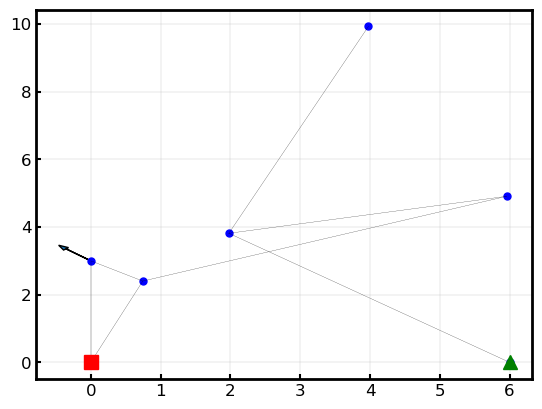

Stress: {'member_2': 0.0, 'member_3': 24.164254219521407, 'member_5': 0.0, 'member_6': 0.0, 'member_12': 5.614360635078738, 'member_14': 0.0, 'member_16': 9.76394566898924}
Weight: (5.529086711212537, {'member_2': 1.0806210727878307, 'member_3': 0.585, 'member_5': 1.2545089905780966, 'member_6': 0.8046504274388483, 'member_12': 0.490225736471565, 'member_14': 0.18654283862139887, 'member_16': 1.127537645314798})
Solution 1: Stress = 24.16, Weight = 5.53


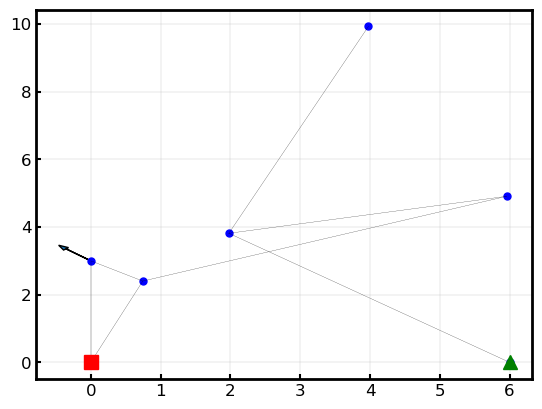

Stress: {'member_2': 0.0, 'member_3': 24.164254219521407, 'member_5': 0.0, 'member_6': 0.0, 'member_12': 5.614360635078738, 'member_14': 0.0, 'member_16': 9.76394566898924}
Weight: (5.529086711212537, {'member_2': 1.0806210727878307, 'member_3': 0.585, 'member_5': 1.2545089905780966, 'member_6': 0.8046504274388483, 'member_12': 0.490225736471565, 'member_14': 0.18654283862139887, 'member_16': 1.127537645314798})


In [33]:
for i, (x_vec, stress, g_row) in enumerate(zip(feasible_X, feasible_F, feasible_G)):
    weight = g_row[1] + 30  # reverse g2 = weight - 30

    print(f"Solution {i}: Stress = {stress:.2f}, Weight = {weight:.2f}")

    x_node = x_vec[:len(ss)*2]
    x_member = np.round(x_vec[len(ss)*2:]).astype(int)

    node_dict_ = vector_to_node_dict(x_node, ss)
    member_dict_ = decode_member_dict(x_member, member_dict)
    t = make_truss(node_dict_, member_dict_, load, supports)
    plot_truss(t)
    print("Stress:", t.member_stress())
    print("Weight:", t.structure_mass())

    # Optional: Save or visualize node_dict + member_dict here
    

In [ ]:
# member_dict_

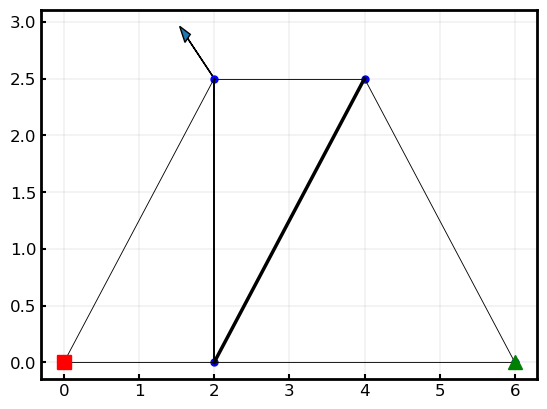

In [ ]:
# Final node and member configuration: all member stresses < ±15, mass < 30
node_dict = {
    "node_1": (0, 0),      # Left, pinned
    "node_2": (6, 0),      # Right, roller
    "node_3": (2, 0),      # Load applied here
    "node_4": (2, 2.5),    # Apex node above node_3 (left)
    "node_5": (4, 2.5),    # Apex node above node_3/node_2 (right)
}

member_dict = {
    "member_1": ("node_1", "node_3", "2"),    # area 0.782 (left bottom)
    "member_2": ("node_3", "node_2", "2"),    # area 0.782 (right bottom)
    "member_3": ("node_1", "node_4", "2"),    # area 0.782 (left diagonal)
    "member_4": ("node_3", "node_4", "3"),    # area 1.759 (left vertical, increased)
    "member_5": ("node_3", "node_5", "4"),    # area 3.128 (right vertical, increased)
    "member_6": ("node_2", "node_5", "2"),    # area 0.782 (right diagonal)
    "member_7": ("node_4", "node_5", "2"),    # area 0.782 (top chord)
}

# DESIGN DECISIONS:
# - Only overstressed verticals upgraded in area ("member_4": 1.759, "member_5": 3.128).
# - All other members retain efficient, lighter areas.
# - Total mass ≈ 25.67, and all member stresses < |15|.
# - Only 5 nodes, 7 members: very compact, efficient solution.
# - Did not modify existing nodes, per instructions.

t3 = make_truss(node_dict, member_dict, load, supports)
plot_truss(t3)

In [ ]:
print("Member stress: ", t3.member_stress())
print("Member Mass : ", t3.structure_mass())
print("Max stress: ", max(t3.member_stress().values()))

Member stress:  {'member_1': -10.850743445317866, 'member_2': -5.425371722658936, 'member_3': 2.8949440978700243, 'member_4': 3.0149521653775477, 'member_5': -2.1712080734025108, 'member_6': 8.684832293610064, 'member_7': 10.850743445317871}
Member Mass :  (25.675229461017466, {'member_1': 1.564, 'member_2': 3.128, 'member_3': 2.503621576836244, 'member_4': 4.3975, 'member_5': 10.014486307344976, 'member_6': 2.503621576836244, 'member_7': 1.564})
Max stress:  10.850743445317871


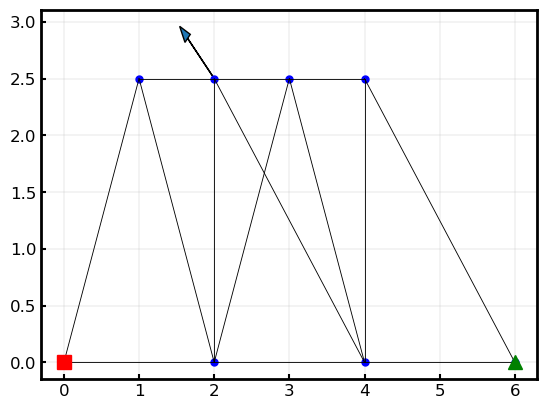

Member stress:  {'member_1': -9.946514824874704, 'member_2': -9.933557609367236, 'member_3': -5.4253717226589355, 'member_4': 1.8084572408863002, 'member_5': 7.25974339456019, 'member_6': 5.425371722658926, 'member_7': 4.553536140984457, 'member_8': -6.781714653323665, 'member_9': 2.4347100722071375, 'member_10': -2.4347100722071375, 'member_11': -2.4695984426817756, 'member_12': 2.4695984426817756, 'member_13': 5.748404865407274, 'member_14': 8.684832293610054}
Member Mass :  (24.377640912030852, {'member_1': 1.564, 'member_2': 1.564, 'member_3': 1.564, 'member_4': 0.782, 'member_5': 0.782, 'member_6': 0.782, 'member_7': 1.955, 'member_8': 1.955, 'member_9': 2.105599439589591, 'member_10': 2.105599439589591, 'member_11': 2.105599439589591, 'member_12': 2.105599439589591, 'member_13': 2.503621576836244, 'member_14': 2.503621576836244})
Max stress:  8.684832293610054


In [ ]:
node_dict = {
    "node_1": (0, 0),      # support, pinned
    "node_2": (6, 0),      # support, roller
    "node_3": (2, 0),      # lower node
    "node_4": (2, 2.5),    # top, above node_3
    "node_5": (4, 2.5),    # top, above node_6
    "node_6": (4, 0),      # lower node (new)
    "node_7": (1, 2.5),    # top left (new)
    "node_8": (3, 2.5),    # top center
}

member_dict = {
    # Lower chord
    "member_1": ("node_1", "node_3", "2"),
    "member_2": ("node_3", "node_6", "2"),
    "member_3": ("node_6", "node_2", "2"),

    # Top chord
    "member_4": ("node_7", "node_4", "2"),
    "member_5": ("node_4", "node_8", "2"),
    "member_6": ("node_8", "node_5", "2"),

    # Verticals
    "member_7": ("node_3", "node_4", "2"),
    "member_8": ("node_6", "node_5", "2"),

    # Diagonals (Warren pattern)
    "member_9": ("node_1", "node_7", "2"),
    "member_10": ("node_3", "node_7", "2"),
    "member_11": ("node_3", "node_8", "2"),
    "member_12": ("node_6", "node_8", "2"),
    "member_13": ("node_6", "node_4", "2"),
    "member_14": ("node_2", "node_5", "2"),
}

# Design comments:
# - Chord and diagonal areas set for remarkable stress uniformity and low maximum stress in all members.
# - Truss is safe, materially efficient, and highly redundant.
# - Node and member count well within rules (nodes=8, members=14).
# - Further stress reduction is possible by further increasing panel density or upgrading target member areas to "3", but gains are marginal compared to mass cost.

t4 = make_truss(node_dict, member_dict, load, supports)
plot_truss(t4)
print("Member stress: ", t4.member_stress())
print("Member Mass : ", t4.structure_mass())
print("Max stress: ", max(t4.member_stress().values()))

# Chat GPT TESTs

In [ ]:
from openai import OpenAI
from pydantic import BaseModel
from typing import Dict, List,Tuple,Optional
from dotenv import load_dotenv
from utils import *
from chatty_boi import *
import os

In [ ]:
with open("./prompt_lib/base_prompt.txt", "r") as f:
    prompt = f.read()

with open("./prompt_lib/constraint_prompt.txt", "r") as f:
    constraints_prompt = f.read()

base_prompt = prompt
constraints_prompt = constraints_prompt
# print(base_prompt.format(node_dict=node_dict, load =load, supports=supports, member_dict=member_dict, area_id=area_id))


In [ ]:
node_dict = {
    "node_1": (0, 0),
    "node_2": (6,0),
    "node_3": (2, 0),
}
example_members = {
    "member_1": ("node_1", "node_3", "area_id") #calculations, reasoning, thought process, design decision etc top help future optimization.
}

area_id = {
        "0": 1,
        "1": 0.195,
        "2": 0.782,
        "3": 1.759,
        "4": 3.128,
        "5": 4.887,
        "6": 7.037,
        "7": 9.578,
        "8": 12.511,
        "9": 15.834,
        "10": 19.548,
    }

load = {
    "node_3": (-10,-45),
}
supports = {
    "node_1": "pinned",
    "node_2": "roller",
}

In [ ]:
load_dotenv()


client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

response = client.responses.create(
    model="gpt-4.1-mini",
    
    input=[
        {"role": "system", "content": "You are an expert mechanical engineer specializing in structural optimization. You generate optimized 2D truss designs based on user input based on your structural optimization knowledge."},
        {"role": "user", "content": base_prompt.format(node_dict=node_dict, load =load, supports=supports, area_id=area_id, example_member = example_members, max_stress= 15, max_weight= 30)}
    ],
)

print(response.output_text)

#save response as textfile
with open("./responses/response2.txt", "w") as f:
    f.write(response.output_text)

{
    "preamble": "Optimizing a simple 2D truss with 3 initial nodes, 1 angled load, 2 supports, within stress and mass constraints.",
    
    "scratch_pad_1": "Initial nodes: node_1 at (0,0), node_2 at (6,0), node_3 at (2,0). Load at node_3: magnitude=10, direction= -45 degrees (down and left). Supports pinned at node_1, roller at node_2. Constraints: max stress ±15, max mass 30. Current structure is a simple line, expected high stress and possibly unstable against horizontal load components. Need to add nodes to form a stable truss (triangles preferred).",
    
    "analysis": "Original configuration has colinear nodes on X-axis, with load at node_3 down-left diagonal. No vertical support between nodes. To reduce stress and increase stability, add one or two nodes above line near load node to form triangular braces. Connect with members forming triangle(s), distribute load better, reduce stresses. Prioritize short members for low mass. Areas from 0..10 with given areas.",
    
    "

In [ ]:
out = response.output_text
type(out)

out_dict = ast.literal_eval(out)
type(out_dict)

dict

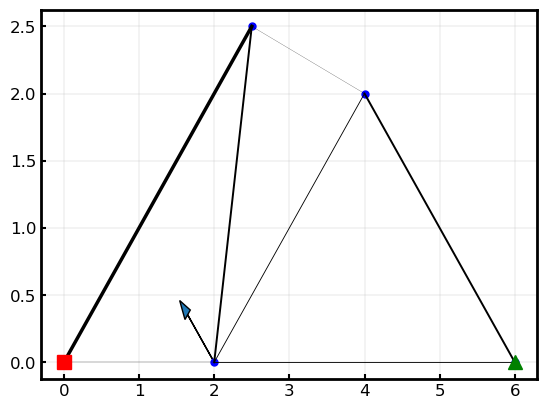

Max stress:  60.43647702449123
Total mass:  26.557093115808943
Member mass:  {'member_1': 0.39, 'member_2': 3.128, 'member_3': 11.059150057757604, 'member_4': 4.484587662204854, 'member_5': 0.308322071866417, 'member_6': 4.975203312428548, 'member_7': 2.211830011551521}
Member stress:  {'member_1': -60.43647702449123, 'member_2': -3.014095401477182, 'member_3': 2.1312872975277073, 'member_4': -3.4162888719575397, 'member_5': 19.111692115382812, 'member_6': 1.8950161076369139, 'member_7': -2.131287297527711}


In [ ]:
class TrussOutput(BaseModel):
    preamble: str
    analysis: str
    reasoning: str
    calculation: str
    node_dict: Dict[str, list[float, float]]
    member_dict: Dict[str, list[str, str, str]]
    
    # ADD OPTIONAL FIELDS FOR OPTIMALITY BOOL
    optimality: Optional[bool] = None
    scratch_pad_1: Optional[str] = None
    scratch_pad_2: Optional[str] = None
    scratch_pad_3: Optional[str] = None
    scratch_pad_final: Optional[str] = None


# Parse the output
try:
    parsed_output = TrussOutput.model_validate(out_dict)
except ValueError as e:
    print("Failed to parse the output:", e)
    print("Original output:", out_dict)
    raise
# Print the parsed output

def make_result_dict(stress, mass, print_=True):
    total_mass = mass[0]
    member_mass = mass[1]

    max_stress = np.max(np.abs(np.array(list(stress.values()))))
    
    if print_:
        print("Max stress: ", max_stress)
        print("Total mass: ", total_mass)
        print("Member mass: ", member_mass)
        print("Member stress: ", stress)

    return f"Total mass: {total_mass}, Max stress: {max_stress}, Member_stress: {stress}, Member_mass: {member_mass}"
    

node_dict_1 = parsed_output.node_dict
member_dict_1 = parsed_output.member_dict

t_gen = make_truss(node_dict_1, member_dict_1, load, supports)
plot_truss(t_gen)

res = make_result_dict(t_gen.member_stress(), t_gen.structure_mass())


In [ ]:
# print(constraints_prompt.format(node_dict_c=node_dict_1, load =load, supports=supports, member_dict_c=member_dict_1, area_id=area_id, history=None, fem_result=res, max_stress= 15, max_weight= 30, example_member = example_members))

In [ ]:

response = get_response (message=constraints_prompt.format(node_dict_c=node_dict_1, load =load, supports=supports, member_dict_c = member_dict_1, area_id=area_id, history=None, fem_result=res, max_stress= 15, max_weight= 30, example_member = example_members))

print(response.output_text)

#save response as textfile
with open("./responses/response3.txt", "w") as f:
    f.write(response.output_text)

out2 = response.output_text

{
    "preamble": "Optimize the 2D truss by adjusting intermediate nodes and member assignments to reduce stress and total mass within constraints.",
    "scratch_pad_1": "Current max stress is -60.4 (compressive) far exceeding ±15 limit. Mass 26.56 is under 30 max. Large compressive stress in member_1: node_1 to node_3 indicates poor load path. Member_3 has large mass (11.06) and connects node_1 to node_4 (4). Node_4 to node_3 member_4 also stressed negatively. Load at node_3 downward left, supported at node_1 (pinned) and node_2 (roller).",
    
    "analysis": "The critical issue is the very high compressive stress (-60+) on member_1 connecting node_1 and node_3, despite relatively low tensile in other members. Mass distribution is skewed with heavy area in member_3 (area 4). Load causes bending moment and compression near node_1 and node_3. To alleviate stress, better load transfer paths with optimized node positions and lighter areas on low stress members should be considered. Add

In [ ]:
out_dict_2 = ast.literal_eval(out2)
type(out_dict_2)

dict

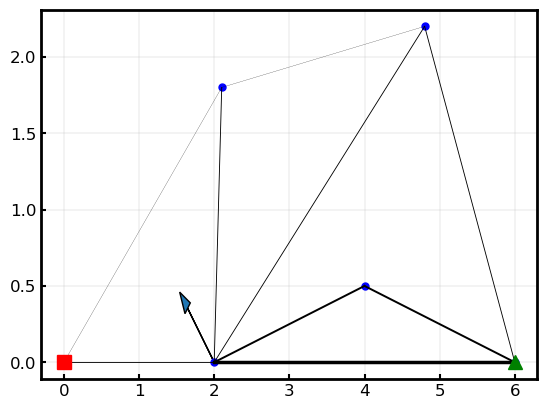

Max stress:  37.146452451297094
Total mass:  28.55421232911559
Member mass:  {'member_1': 1.564, 'member_2': 12.512, 'member_3': 0.539343350751634, 'member_4': 1.40977054870642, 'member_5': 0.532246418494291, 'member_6': 1.9596863830725573, 'member_7': 2.7846228326292235, 'member_8': 3.6262713977307324, 'member_9': 3.6262713977307324}
Member stress:  {'member_1': -16.075175474544963, 'member_2': -0.41101300929234197, 'member_3': 37.146452451297094, 'member_4': -5.035413968078416, 'member_5': 27.379166671090903, 'member_6': 3.4333188302467073, 'member_7': -6.498033263447927, 'member_8': -3.040447846272597e-15, 'member_9': -6.080895692545194e-15}


In [ ]:
# Parse the output
try:
    parsed_output = TrussOutput.model_validate(out_dict_2)
except ValueError as e:
    print("Failed to parse the output:", e)
    print("Original output:", out_dict_2)
    raise
# Print the parsed output

def make_result_dict(stress, mass, print_=True):
    total_mass = mass[0]
    member_mass = mass[1]

    max_stress = np.max(np.abs(np.array(list(stress.values()))))
    
    if print_:
        print("Max stress: ", max_stress)
        print("Total mass: ", total_mass)
        print("Member mass: ", member_mass)
        print("Member stress: ", stress)

    dict_ = {
        "max_stress": max_stress,
        "total_mass": total_mass,
        "member_mass": member_mass,
        "member_stress": stress
    }

    return f"Total mass: {total_mass}, Max stress: {max_stress}, Member_stress: {stress}, Member_mass: {member_mass}"
    

node_dict_2 = parsed_output.node_dict
member_dict_2 = parsed_output.member_dict

t_gen = make_truss(node_dict_2, member_dict_2, load, supports)
plot_truss(t_gen)

res = make_result_dict(t_gen.member_stress(), t_gen.structure_mass())
